## Tutorial on Backpropagation

In [2]:
%matplotlib inline
import numpy as np
from pprint import pprint
from random import random
from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')

In [3]:
def actv_fn(x, fn='sigmoid', derivative=False):
    if not derivative:
        if fn == 'sigmoid': 
            return 1/(1+np.exp(-x))
        elif fn == 'relu':
            if x>0:
                return x
            else:
                return 0.01*x # leaky relu
        elif fn == 'tanh':
            return (2/(1+np.exp(-2*x)))-1
        else:
            return None
    else:
        if fn == 'sigmoid':
            # input x is value of sigmoid(x)
            return x*(1-x)
        elif fn == 'relu':
            # input x is value of relu(x) i.e x or 0.01x
            if x: 
                return 1
            return 0.01
        elif fn == 'tanh':
            # input x is value of tanh(x)
            return 1 - x*x
        else:
            return None
    
def error(y, yhat):
    return np.sum((np.subtract(yhat, y)**2)/2)

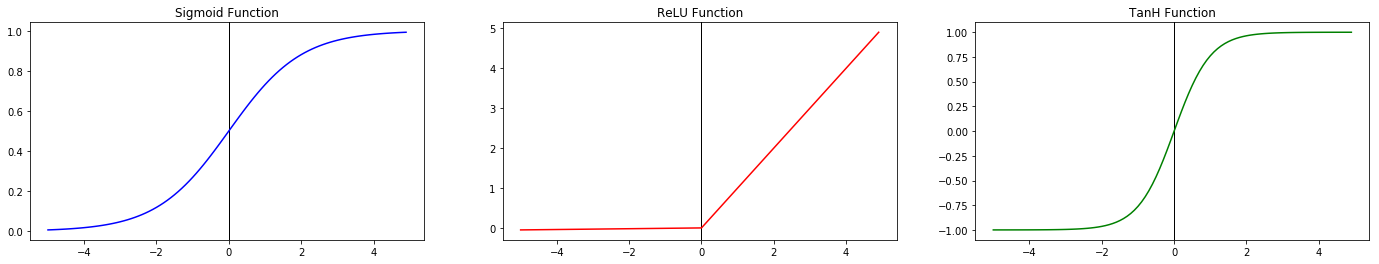

In [4]:
x = np.arange(-5, 5, 0.1)
fig = plt.figure(figsize=(24, 4))

y1 = [actv_fn(i, fn='sigmoid') for i in x]
ax1 = fig.add_subplot(131)
ax1.set_title('Sigmoid Function')
ax1.axvline(0, linewidth=1, color='black')
ax1.plot(x, y1, 'b-')

y2 = [actv_fn(i, fn='relu') for i in x]
ax2 = fig.add_subplot(132)
ax2.set_title('ReLU Function')
ax2.axvline(0, linewidth=1, color='black')
ax2.plot(x, y2, 'r-')

y3 = [actv_fn(i, fn='tanh') for i in x]
ax3 = fig.add_subplot(133)
ax3.set_title('TanH Function')
ax3.axvline(0, linewidth=1, color='black')
ax3.plot(x, y3, 'g-')

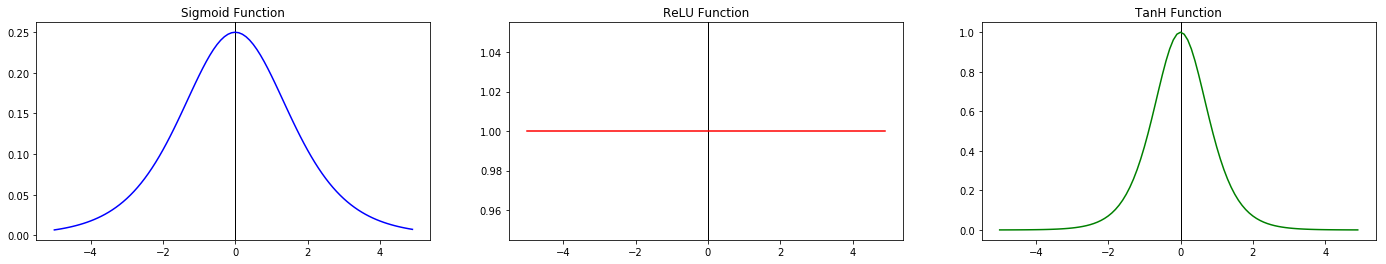

In [21]:
x = np.arange(-5, 5, 0.1)
fig = plt.figure(figsize=(24, 4))

y1 = [actv_fn(i, fn='sigmoid') for i in x]
y1 = [actv_fn(i, fn='sigmoid', derivative=True) for i in y1]
ax1 = fig.add_subplot(131)
ax1.set_title('Derivative of Sigmoid Function')
ax1.axvline(0, linewidth=1, color='black')
ax1.plot(x, y1, 'b-')

y2 = [actv_fn(i, fn='relu') for i in x]
y2 = [actv_fn(i, fn='relu', derivative=True) for i in y2]
ax2 = fig.add_subplot(132)
ax2.set_title('Derivative of ReLU Function')
ax2.axvline(0, linewidth=1, color='black')
ax2.plot(x, y2, 'r-')

y3 = [actv_fn(i, fn='tanh') for i in x]
y3 = [actv_fn(i, fn='tanh', derivative=True) for i in y3]
ax3 = fig.add_subplot(133)
ax3.set_title('Derivative of TanH Function')
ax3.axvline(0, linewidth=1, color='black')
ax3.plot(x, y3, 'g-')

In [22]:
class NeuralNet:
    def __init__(self, data, labels, weights, biases, function='sigmoid', learning_rate=0.05, tolerance=1e-5, max_iter=10000):
        self.x = data
        self.y = labels
        self.wts = weights
        self.b = biases
        self.fn = function
        self.eta = learning_rate
        self.tol = tolerance
        self.iterations = max_iter
        self.activations = []
        self.ERRORS = []
        self.show_params()
    
    def show_params(self):
        print "Activation Function :", self.fn
        print "Learning Rate :", self.eta
        print "Tolerance :", self.tol
        print "Maximum Iterations :", self.iterations
        print "Number of layers :", self.wts.ndim
        for i in range(self.wts.ndim):
            print "----------------------"
            if i==0:
                print "Input Layer :", self.wts.shape[i], "units"
            elif i==self.wts.ndim-1:
                print "Output Layer :", self.wts.shape[i], "units"
                print "----------------------"
                break
            else:
                print "Layer", i, " (Hidden) :", self.wts.shape[i], "units"
            print "Weights to next layer :"
            pprint(self.wts[i])
        print ""
    
        
    def train(self):
        for i in range(self.iterations):
            if len(self.ERRORS)>1:
                err_delta = self.ERRORS[-2]-self.ERRORS[-1]
                #print err_delta
                if err_delta<self.tol:
                    print "Converged at step", i-1, "with error", self.ERRORS[-1]
                    break
            self.frontprop()
            self.backprop()
    
    def frontprop(self, mode='train', pred_input=None):
        #print "Original weights"
        #pprint(self.wts)
        #print ""
        print "Iteration", len(self.ERRORS)
        print "Starting frontprop pass"
        if mode == 'train':
            fp_input=self.x
        elif mode == 'predict':
            assert(pred_input is not None)
            fp_input = pred_input
        else:
            return None
        
        for j in range(self.wts.shape[0]):
            #print "weight arr index :", j
            #print "input"
            if j == 0:
                inp = fp_input.copy()
                #try:
                #    np.dot(self.wts[j][0], inp)
                #except ValueError, e:
                #    print "INCOMPATIBLE DIMS"
                #print inp, "\n"
            else:
                inp = self.activations[-1]
                #print inp, "\n"
            outs = []
            for k in range(self.wts.shape[j]):
                #print "NET CALC : input", inp, ", weights", self.wts[j][k], ", biases", self.b[j]
                #print "W: len", len(self.wts), ":::",self.wts.shape,":::",self.wts[j].shape,":::",self.wts[j][k].shape, "X:", inp.shape, "b:", self.b.shape
                net = np.dot(self.wts[j][k], inp)+self.b[j]
                #print "NET :"
                #pprint(net)
                #print "OUT :"
                out = actv_fn(net, fn=self.fn)
                #pprint(out)
                outs.append(out)
                #print "----------"
            #print outs
            self.activations.append(np.array(outs))
            #print "----------------------------"
        final = self.activations[-1]
        final = np.array(final)
        total_error = 0.0
        for l in range(len(final)):
            #print l, final[l], self.y[l]
            err = error(final[l], self.y[l])
            total_error += err
        if mode == 'predict':
            return final
        print "total error", total_error
        self.ERRORS.append(total_error)
    
    def backprop(self):
        print "Starting backprop pass"
        #print "Prev layers", len(self.activations)
        for j in range(self.wts.shape[0]):
            #print "Prev layers j", len(self.activations[j])
            for k in range(self.wts.shape[j]):
                p1 = self.activations[k][j]-self.y[j]
                #print "out_o - target", p1
                p2 = actv_fn(self.activations[k][j], fn=self.fn, derivative=True)
                #print "out_o*(1-out_o)", p2
                p3 = self.activations[k-1][j]
                #print "out_h", p3
                delta = -1*p1*p2*p3
                #print "delta", delta
                #print "change", self.eta*delta
                for l in range(len(self.wts[k][j])):
                    new_w = self.wts[k][j][l] + self.eta*delta # learning step
                    self.wts[k][j][l] = new_w
                #print ""
        #print "Modified Weights"
        #pprint(self.wts)
        print "\n====================================================\n"
                
    def predict(self, input_x):
        return self.frontprop(mode='predict', pred_input=input_x)
    
    def plot_loss(self):
        plt.figure(figsize=(10,6))
        plt.xlim(0, 1.2*len(self.ERRORS))
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Training Loss over time')
        plt.plot([i for i in range(len(self.ERRORS))], self.ERRORS, 'b-')
        plt.show()

Activation Function : sigmoid
Learning Rate : 0.5
Tolerance : 1e-05
Maximum Iterations : 1000
Number of layers : 3
----------------------
Input Layer : 2 units
Weights to next layer :
array([[ 0.15,  0.2 ],
       [ 0.25,  0.3 ]])
----------------------
Layer 1  (Hidden) : 2 units
Weights to next layer :
array([[ 0.4 ,  0.45],
       [ 0.5 ,  0.55]])
----------------------
Output Layer : 2 units
----------------------

Iteration 0
Starting frontprop pass
total error 0.29837110876
Starting backprop pass


Iteration 1
Starting frontprop pass
total error 0.291036316578
Starting backprop pass


Iteration 2
Starting frontprop pass
total error 0.283643557043
Starting backprop pass


Iteration 3
Starting frontprop pass
total error 0.27620148507
Starting backprop pass


Iteration 4
Starting frontprop pass
total error 0.268719165641
Starting backprop pass


Iteration 5
Starting frontprop pass
total error 0.26120603932
Starting backprop pass


Iteration 6
Starting frontprop pass
total error 0.25

Starting frontprop pass
total error 0.000255000561771
Starting backprop pass


Iteration 146
Starting frontprop pass
total error 0.000245054223056
Starting backprop pass


Converged at step 146 with error 0.000245054223056


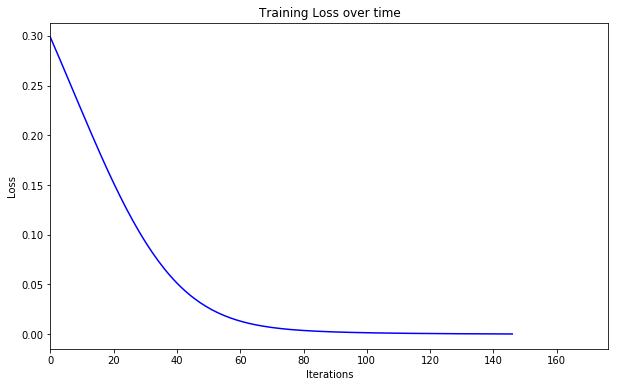

In [23]:
X = np.array([[0.05], [0.10]])
Y = np.array([[0.01], [0.99]])
W = np.array([
                [[0.15, 0.20],[0.25, 0.30]], #layer 0->1
                [[0.40, 0.45],[0.50, 0.55]]  #layer 1->2
               ])
B = np.array([[0.35], [0.6]])

NN = NeuralNet(X, Y, W, B, 'sigmoid', 0.5, 1e-5, 1000)
NN.train()
NN.plot_loss()

In [17]:
print NN.activations[-1]

[[ 1.]
 [ 1.]]
